In [3]:
# API key ID: otlwwfxero72fkms03hi49x2
# API key secret: 5qbnpzqphl1y8bz6eggxraxlzlnbnhso49bro4925r1rpxj6sn
# app token: 8y23ArYxg4pcvOMgWzMFSC0nB
# secret app token: pZgwEL4lKm2r1s868Saz3EJ1ebpTKy-FzglU

# crime data docs: https://dev.socrata.com/foundry/data.cityofchicago.org/9hwr-2zxp

# make sure to install these packages before running:
!pip install pandas
!pip install sodapy

In [4]:
import pandas as pd
import sodapy
from sodapy import Socrata

In [5]:
# crime_url = "https://data.cityofchicago.org/resource/9hwr-2zxp.json"


app_token = "8y23ArYxg4pcvOMgWzMFSC0nB"

# Example authenticated client (needed for non-public datasets):
client = Socrata("data.cityofchicago.org",
                 app_token, 
                 username="ch35@illinois.edu",
                 password="68M8rz3vF!StBjD")


# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("9hwr-2zxp", limit = 2000)

# Convert to pandas DataFrame
crime_df = pd.DataFrame.from_records(results)

print(crime_df.shape)

(2000, 22)


In [6]:
crime_df.head()

,date,location,district,block,y_coordinate,latitude,description,location_description,updated_on,community_area,...,ward,case_number,year,domestic,fbi_code,longitude,beat,primary_type,arrest,id
0,2022-11-10T23:52:00.000,"{'latitude': '41.684789786', 'human_address': ...",022,016XX W 115TH ST,1828441,41.684789786,TO PROPERTY,BAR OR TAVERN,2022-11-17T15:49:42.000,75,...,34,JF470191,2022,False,14,-87.6633151,2234,CRIMINAL DAMAGE,False,12889112
1,2022-11-10T23:51:00.000,"{'latitude': '41.927622911', 'human_address': ...",019,017XX W ALTGELD ST,1916912,41.927622911,POSSESS - CANNABIS MORE THAN 30 GRAMS,STREET,2022-11-17T15:49:42.000,7,...,32,JF470214,2022,False,18,-87.670885873,1931,NARCOTICS,True,12889088
2,2022-11-10T23:45:00.000,"{'latitude': '41.903378801', 'human_address': ...",014,012XX N HOYNE AVE,1908059,41.903378801,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,2022-11-17T15:49:42.000,24,...,1,JF470208,2022,False,04B,-87.679706644,1424,BATTERY,False,12889085
3,2022-11-10T23:45:00.000,"{'latitude': '41.751822096', 'human_address': ...",006,078XX S PEORIA ST,1852903,41.751822096,TO VEHICLE,ALLEY,2022-11-17T15:49:42.000,71,...,17,JF470206,2022,False,14,-87.646500811,0621,CRIMINAL DAMAGE,False,12889140
4,2022-11-10T23:45:00.000,"{'latitude': '41.859767799', 'human_address': ...",010,015XX S HAMLIN AVE,1892086,41.859767799,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...",APARTMENT,2022-11-17T15:49:42.000,29,...,24,JF470478,2022,True,04B,-87.720109024,1014,BATTERY,False,12890167


In [7]:
month = [i[0:7] for i in crime_df.date]

In [6]:
crime_df["month"] = month

In [7]:
crime_agg = crime_df.groupby(by=month).size()
crime_sum = crime_df.groupby(by=month).sum()

In [ ]:
crime_agg

In [ ]:
crime_sum

In [8]:
# temp
crime_df.columns

Index(['date', 'location', 'district', 'block', 'y_coordinate', 'latitude',
       'description', 'location_description', 'updated_on', 'community_area',
       'iucr', 'x_coordinate', 'ward', 'case_number', 'year', 'domestic',
       'fbi_code', 'longitude', 'beat', 'primary_type', 'arrest', 'id',
       'month'],
      dtype='object')

In [10]:
crime_df.info()
crime_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   date                  2000 non-null   object
 1   location              1962 non-null   object
 2   district              2000 non-null   object
 3   block                 2000 non-null   object
 4   y_coordinate          1962 non-null   object
 5   latitude              1962 non-null   object
 6   description           2000 non-null   object
 7   location_description  1992 non-null   object
 8   updated_on            2000 non-null   object
 9   community_area        2000 non-null   object
 10  iucr                  2000 non-null   object
 11  x_coordinate          1962 non-null   object
 12  ward                  2000 non-null   object
 13  case_number           2000 non-null   object
 14  year                  2000 non-null   object
 15  domestic              2000 non-null   

,date,location,district,block,y_coordinate,latitude,description,location_description,updated_on,community_area,...,case_number,year,domestic,fbi_code,longitude,beat,primary_type,arrest,id,month
0,2022-11-09T23:45:00.000,"{'latitude': '41.965248711', 'human_address': ...",017,046XX N FRANCISCO AVE,1930561,41.965248711,OVER $500,STREET,2022-11-16T15:51:52.000,14,...,JF469910,2022,False,06,-87.701037211,1713,THEFT,False,12888758,2022-11
1,2022-11-09T23:45:00.000,"{'latitude': '41.853718318', 'human_address': ...",012,021XX S WOOD ST,1889981,41.853718318,AGGRAVATED - HANDGUN,APARTMENT,2022-11-16T15:51:52.000,31,...,JF468923,2022,False,04B,-87.670980997,1234,BATTERY,False,12888055,2022-11
2,2022-11-09T23:30:00.000,"{'latitude': '41.772532392', 'human_address': ...",003,067XX S JEFFERY BLVD,1860610,41.772532392,AUTOMOBILE,STREET,2022-11-16T15:51:52.000,43,...,JF469056,2022,False,07,-87.57646936,0331,MOTOR VEHICLE THEFT,False,12888163,2022-11
3,2022-11-09T23:30:00.000,"{'latitude': '41.885325435', 'human_address': ...",001,001XX N STATE ST,1901592,41.885325435,SIMPLE,SIDEWALK,2022-11-16T15:51:52.000,32,...,JF468948,2022,False,08B,-87.627930066,0111,BATTERY,False,12888071,2022-11
4,2022-11-09T23:26:00.000,"{'latitude': '41.93939819', 'human_address': '...",017,027XX W BELMONT AVE,1921150,41.93939819,DOMESTIC BATTERY SIMPLE,APARTMENT,2022-11-16T15:51:52.000,21,...,JF468940,2022,True,08B,-87.696562292,1733,BATTERY,True,12888129,2022-11


In [8]:

crime_df[["district", "y_coordinate", "latitude", "community_area", "x_coordinate", "ward", "longitude", "beat"]] = crime_df[["district", "y_coordinate", "latitude", "community_area", "x_coordinate", "ward", "longitude", "beat"]].apply(pd.to_numeric)
crime_df[["district", "y_coordinate", "latitude", "community_area", "x_coordinate", "ward", "longitude", "beat"]].describe()





,district,y_coordinate,latitude,community_area,x_coordinate,ward,longitude,beat
count,2000.000000,1.957000e+03,1957.000000,2000.000000,1.957000e+03,2000.000000,1957.000000,2000.000000
mean,11.226500,1.885869e+06,41.842401,36.743000,1.165560e+06,22.460500,-87.667977,1145.564000
std,7.148689,3.179817e+04,0.087447,21.354272,1.609838e+04,14.090021,0.058581,714.852909
min,1.000000,1.817016e+06,41.652700,1.000000,1.100658e+06,1.000000,-87.905227,111.000000
25%,5.000000,1.858674e+06,41.767449,23.000000,1.154034e+06,9.000000,-87.709992,524.000000
50%,10.000000,1.890867e+06,41.856114,32.000000,1.167150e+06,22.000000,-87.661674,1031.000000
75%,17.000000,1.909405e+06,41.907079,53.000000,1.176989e+06,33.250000,-87.625817,1723.000000
max,25.000000,1.951220e+06,42.021747,77.000000,1.203517e+06,50.000000,-87.530452,2535.000000


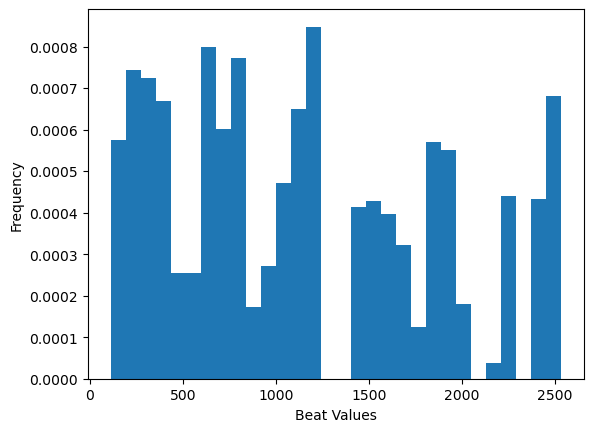

In [12]:
import matplotlib.pyplot as plt

x = crime_df["beat"]

plt.hist(x, density=True, bins=30)  # density=False would make counts
plt.ylabel('Frequency')
plt.xlabel('Beat Values');
 
# Show plot
plt.show()

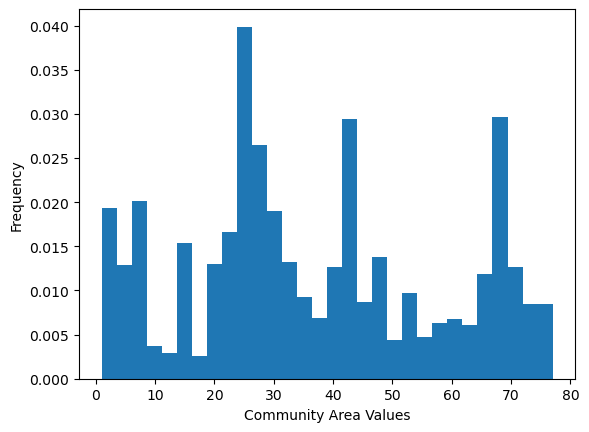

In [14]:

x = crime_df["community_area"]

plt.hist(x, density=True, bins=30)  # density=False would make counts
plt.ylabel('Frequency')
plt.xlabel('Community Area Values');
 
# Show plot
plt.show()